In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,196.5,5.285739,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,196.5,5.285739,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [8]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']]

y = df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,196.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,196.5,False
435,141,0,0,42.4,0.205,29,False,196.5,False


In [12]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [13]:
X_test.shape, y_test.shape

((154, 9), (154,))

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
# 최적의 max_depth 찾기
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 87.01298701298701
6 81.81818181818183
7 82.46753246753246
8 80.51948051948052
9 81.81818181818183
10 81.16883116883116
11 80.51948051948052


In [46]:
# Grid Search

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': range(3, 12), 
              'max_features': [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [48]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [49]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.9, random_state=42)

In [50]:
clf.best_score_

0.8713981074236973

In [53]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.001884,0.000426,0.000593,0.000045,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.813008,0.886179,0.861789,0.886179,0.909836,0.871398,0.032912,1
22,0.001900,0.001216,0.000490,0.000056,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.878049,0.861789,0.804878,0.886179,0.901639,0.866507,0.033391,2
17,0.001240,0.000065,0.000449,0.000010,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.878049,0.878049,0.796748,0.902439,0.877049,0.866467,0.036152,3
12,0.001733,0.000949,0.000743,0.000520,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.845528,0.910569,0.813008,0.853659,0.901639,0.864881,0.036414,4
27,0.001415,0.000293,0.000450,0.000020,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.869919,0.861789,0.829268,0.894309,0.860656,0.863188,0.020846,5


In [54]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [64]:
clf.score(X_test, y_test)

0.8766233766233766

In [71]:
# 이렇게 하면 grid search와 크게 다르지 않음

param_distributions = {'max_depth': range(2, 20), 'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV(model, param_distributions, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.9; total time=   0.0s
[CV] END ......................max_depth=3, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [72]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [73]:
clf.best_score_

0.8713981074236973

In [93]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 6, 12,  5, 15, 18, 14,  8,  4,  8, 11])

In [94]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.89696785, 0.89301008, 0.92941346, 0.99956049, 0.92343487,
       0.73493071, 0.97518616, 0.98239858, 0.93623778, 0.7957957 ,
       0.85776862, 0.95180245, 0.96208996, 0.86107205, 0.95812223,
       0.80054918, 0.97285759, 0.80375383, 0.71869513, 0.79265434,
       0.75600279, 0.80362114, 0.925064  , 0.7115252 , 0.85465917,
       0.89795381, 0.9085315 , 0.72677409, 0.70290186, 0.99635032,
       0.87756641, 0.95524926, 0.84500112, 0.90146369, 0.89867132,
       0.78017679, 0.77449086, 0.77281592, 0.70655844, 0.87154888,
       0.76532816, 0.94268107, 0.73312863, 0.75439842, 0.74804717,
       0.80132165, 0.82183586, 0.87888305, 0.93652266, 0.98465516,
       0.75850423, 0.93673972, 0.83330533, 0.84096699, 0.93087248,
       0.72468558, 0.8900816 , 0.77947986, 0.70994868, 0.75468781,
       0.94764337, 0.78847971, 0.98993852, 0.90278632, 0.75979068,
       0.79910529, 0.96561525, 0.80801612, 0.87869331, 0.85692343,
       0.94929242, 0.77683566, 0.93025137, 0.94803952, 0.79281

In [95]:
param_distributions = {'max_depth': max_depth, 'max_features': max_features, 'min_sample_split':list(range(2, 7))}

from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV(model, param_distributions, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [96]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [97]:
clf.best_score_

0.8713981074236973

In [98]:
clf.score(X_test, y_test)

0.8766233766233766

In [99]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.001425,0.000040,0.000514,0.000013,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.813008,0.886179,0.861789,0.886179,0.909836,0.871398,0.032912,1
22,0.001295,0.000078,0.000453,0.000022,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.878049,0.861789,0.804878,0.886179,0.901639,0.866507,0.033391,2
17,0.001299,0.000116,0.000463,0.000025,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.878049,0.878049,0.796748,0.902439,0.877049,0.866467,0.036152,3
12,0.001557,0.000571,0.000584,0.000194,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.845528,0.910569,0.813008,0.853659,0.901639,0.864881,0.036414,4
27,0.001654,0.000773,0.000472,0.000048,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.869919,0.861789,0.829268,0.894309,0.860656,0.863188,0.020846,5


In [83]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [66]:
abs(y_predict - y_test).sum()

30

In [67]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

80.51948051948052

In [68]:
feature_names = X_train.columns.tolist()

/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

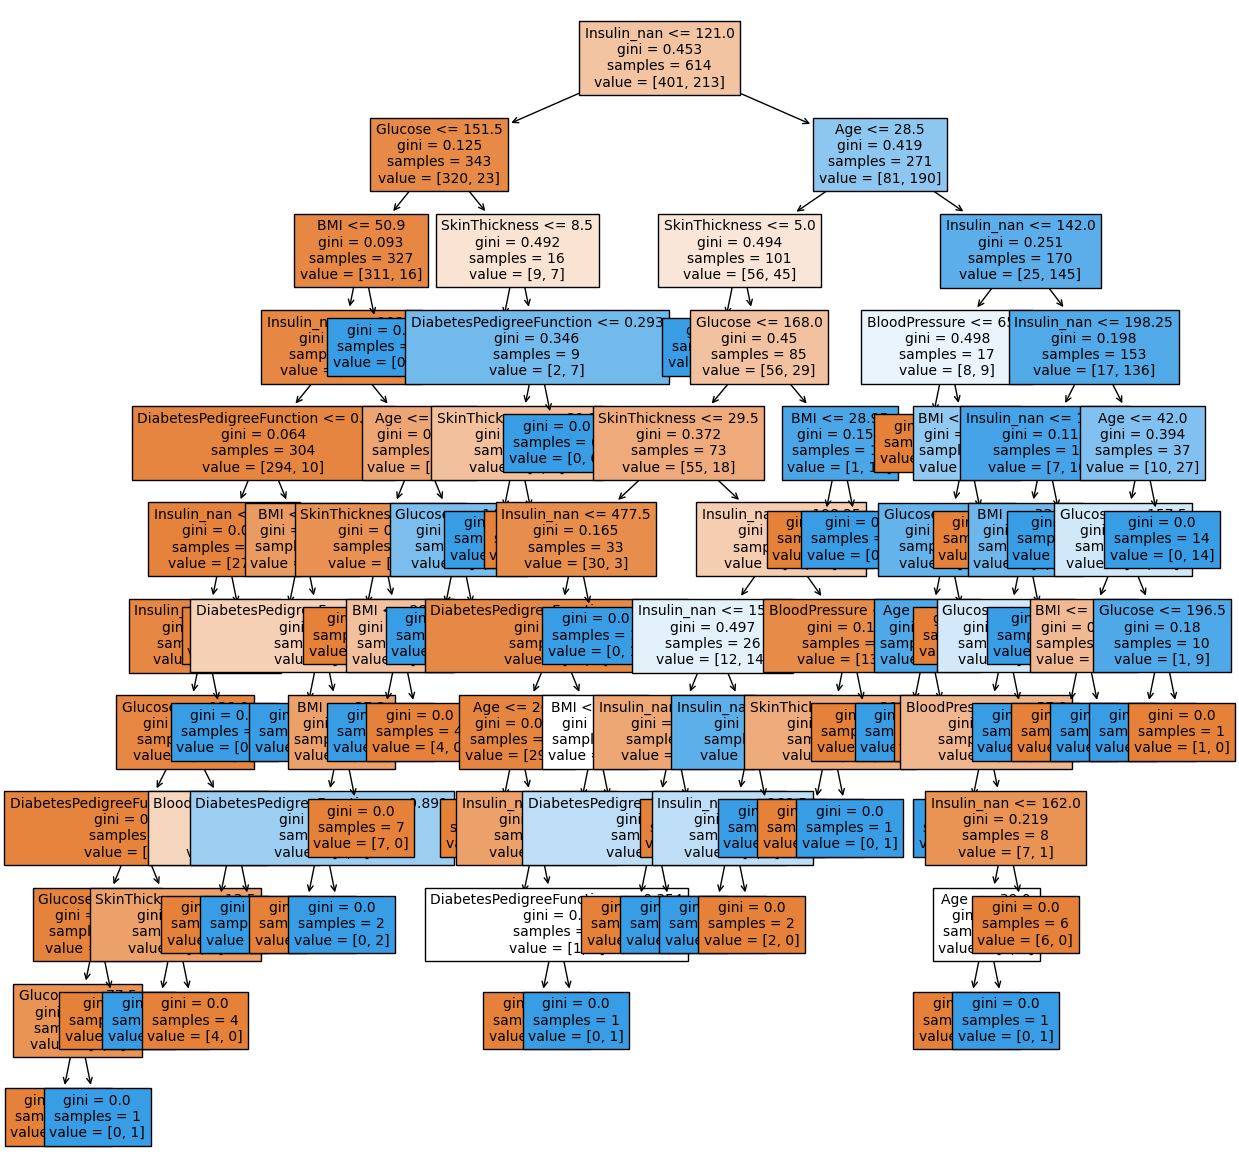

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [109]:
#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(random_state=42)
#model

DecisionTreeClassifier(random_state=42)

In [114]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model

RandomForestClassifier(random_state=42)

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [136]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [137]:
model.feature_importances_

array([1.01651006e-01, 3.76970892e-03, 7.02820442e-02, 4.01488451e-02,
       3.02145958e-02, 1.05253184e-01, 4.88247728e-04, 6.48192368e-01,
       0.00000000e+00])

In [138]:
feature_names = X_train.columns.to_list()

<AxesSubplot:>

/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

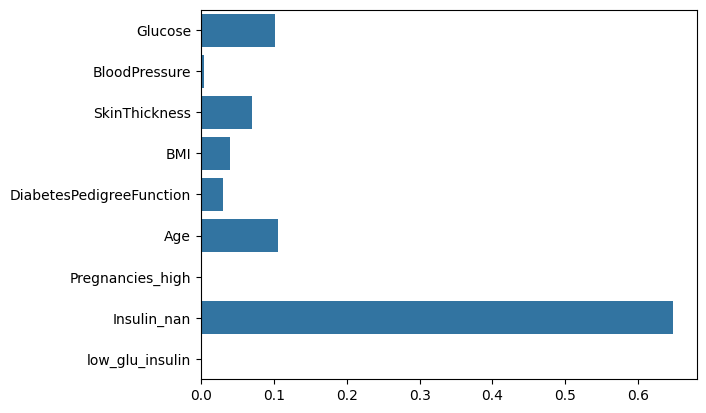

In [139]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [140]:
(y_predict != y_test).sum()

24

In [141]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441